Upper Confidence Bound (UCB)

Importing the Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing the Data Set

In [13]:
df=pd.read_csv("Ads_CTR_Optimisation.csv")
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Implementing the UBC algorithm

In [14]:
import math
# total number of user 
N=10000
#! no of ads
d=10
#! no of ads selected upto 10000
Ads_Selected=[]
# list of 10 0s
number_of_selection=[0]*d
# ! sums of rewards
Sum_of_Reward=[0]*d
Total_Reward=0
for j in range(N):
    ad=0
    max_upper_bound=0
    for i in range(d):
        if (number_of_selection[i]>0):
            Average_Reward=Sum_of_Reward[i]/number_of_selection[i]
            delta_i=math.sqrt((3/2)*(math.log(j+1)/number_of_selection[i]))
            upper_bound=Average_Reward+delta_i
        else:
            upper_bound=1e400
            # make its value to max value
        if (upper_bound>max_upper_bound):
            max_upper_bound=upper_bound
            ad=i
    Ads_Selected.append(ad)
    number_of_selection[ad]+=1
    reward=df.values[j,ad]
    Sum_of_Reward[ad]+=reward
    Total_Reward+=reward            
# print(Sum_of_Reward)
# print(number_of_selection)
# print(reward)
# print(Total_Reward)
# print(Ads_Selected)


[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]
0
2178
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 

Visualizing the Results

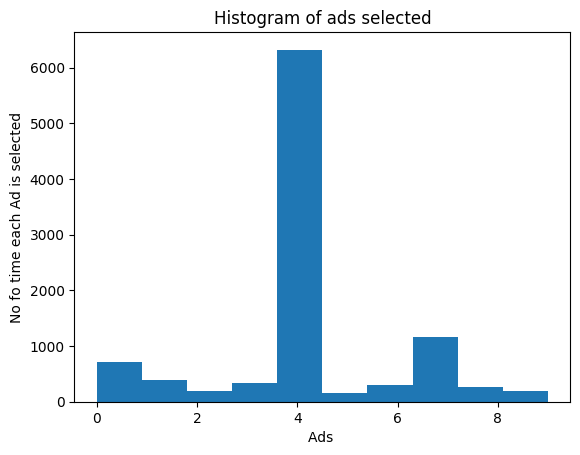

In [15]:
plt.hist(Ads_Selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads ")
plt.ylabel("No fo time each Ad is selected")
plt.savefig("Histogram of UPPER CONFIDENCE BOUND.png")
plt.show()